In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

/home/mhanowar/Desktop/GNN_repos_server/MAGIK/MAGIKenv/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [27]:
# Load nodes for all timesteps from a .npy file
filepath = '/home/mhanowar/Downloads/dataframe100frames.csv'  # Replace with the actual file path
df = pd.read_csv(filepath)
atom_types = ['o', 'os', 'n', 'hn']
hb_atom = df.query('Atom_Type in @atom_types').reset_index(drop=True)
hb_atom

,X,Y,Z,Atom_Name,Residue_Name,Residue_ID,Atom_Type,Timeframe
0,10.329666,-3.320613,27.787273,O8,CSP,1,os,0
1,8.722559,-3.081730,29.347841,O10,CSP,1,o,0
2,10.848876,-2.234815,29.438032,N11,CSP,1,n,0
3,7.161129,-0.628286,22.912786,O20,CSP,1,os,0
4,6.089050,-0.375813,24.853952,O22,CSP,1,o,0
...,...,...,...,...,...,...,...,...
88395,56.014942,50.285019,44.999348,O2,SFL,12,o,99
88396,64.500870,21.924061,50.197891,O1,SFL,13,os,99
88397,61.827641,20.438919,52.889214,O2,SFL,13,o,99
88398,19.593027,50.211624,47.519764,O1,SFL,14,os,99


In [39]:
def extract_edges(nodes, distance_threshold):
    pairwise_distances = pdist(nodes)
    distance_matrix = squareform(pairwise_distances)
    edges_indices = np.where(distance_matrix < distance_threshold)
    edges = [(i, j) for i, j in zip(edges_indices[0], edges_indices[1]) if i < j]
    return edges


In [40]:
def display_graph(nodes, edges):
    G = nx.Graph()

    for i, coordinates in enumerate(nodes):
        G.add_node(i, pos=(coordinates[0], coordinates[1]))

    G.add_edges_from(edges)

    node_positions = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(16, 16))
    plt.title(f'Graph')
    nx.draw(G, pos=node_positions, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, edge_color='gray')
    plt.show()



In [44]:
# Load nodes for all timesteps from a .npy file
nodes_file = '/home/mhanowar/Downloads/data10k.npy'  # Replace with the actual file path
all_nodes = np.load(nodes_file)
# Number of nodes
num_nodes, _ = all_nodes[0].shape
print(num_nodes)
# Number of timesteps
distance_threshold = 2


668


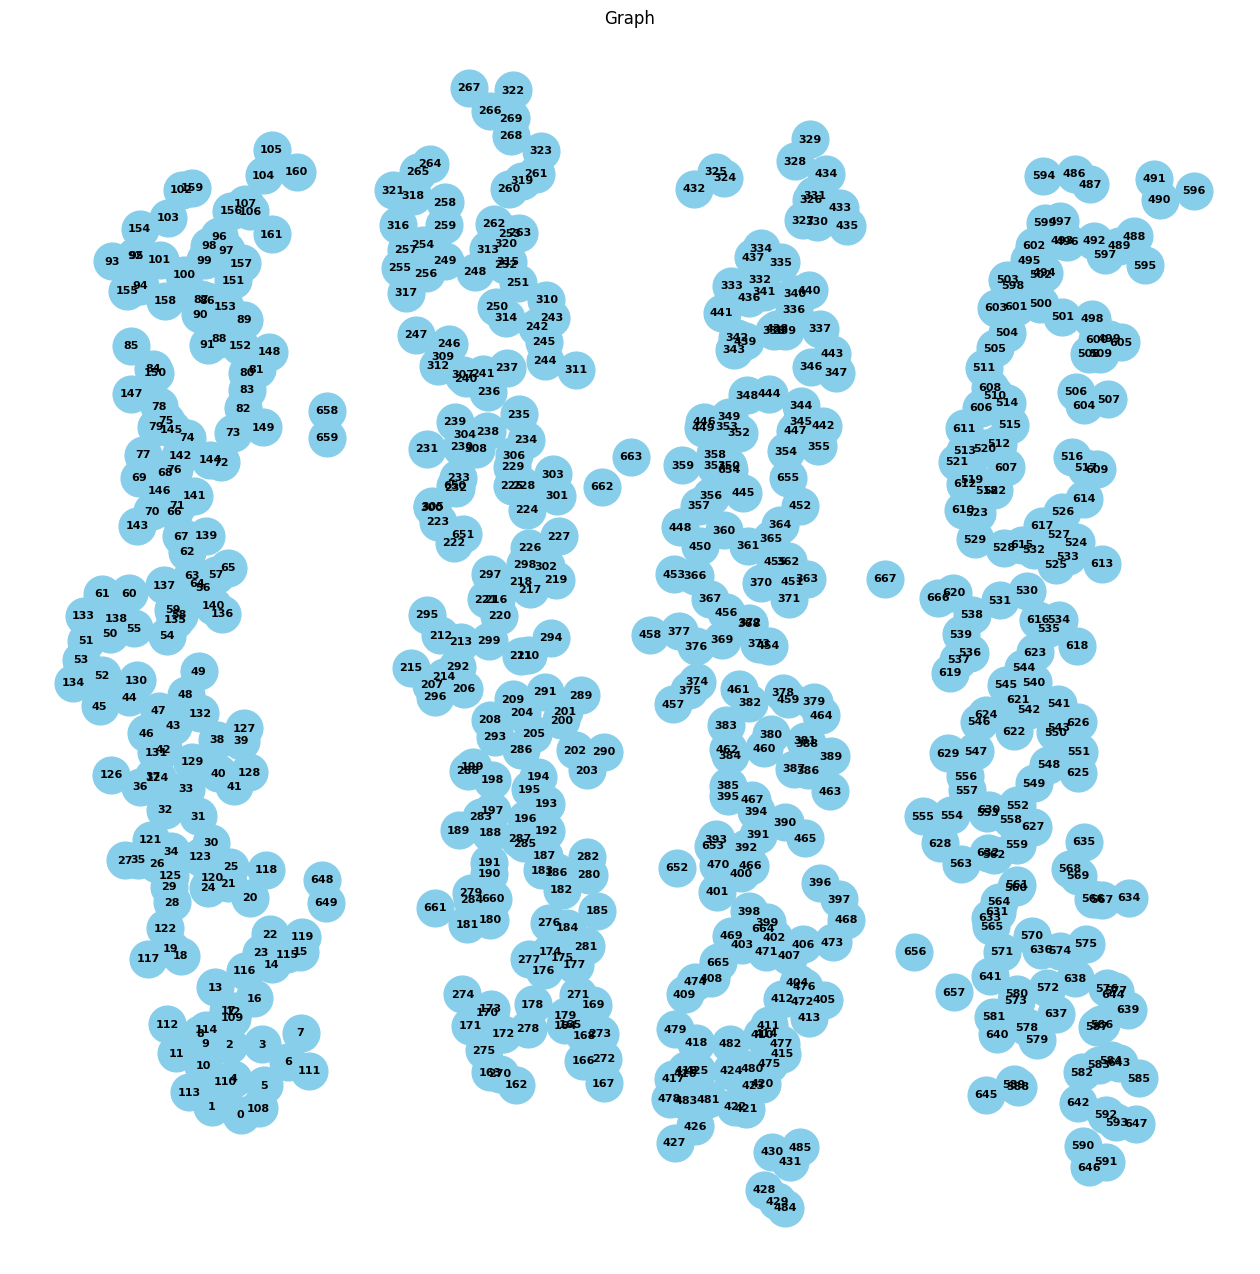

18


In [42]:
# Get node coordinates
nodes = all_nodes[0]

# Extract edges based on the distance threshold
edges = extract_edges(nodes, distance_threshold)

# Display the graph at each timestep
display_graph(nodes, edges)

print (len(edges))

In [43]:
# Create a DataFrame to store node information for every edge
columns = ['Edge', 'Node1', 'Node2']
df_node_info = pd.DataFrame(columns=columns)

# Save node information to DataFrame
for edge_num, edge in enumerate(edges):
    node1 = edge[0]
    node2 = edge[1]
    df_node_info = pd.concat([df_node_info, pd.DataFrame({
        'Edge': [edge_num],
        'Node1': [node1],
        'Node2': [node2],
    })], ignore_index=True)

# Print the DataFrame
df_node_info

,Edge,Node1,Node2
0,0,1,113
1,1,19,122
2,2,30,123
3,3,37,131
4,4,55,138
5,5,142,144
6,6,205,286
7,7,223,305
8,8,261,323
9,9,309,312
